# Question-1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('dynamicCheckerBoard.png', 0)  # image should be in grayscale

P, Q = image.shape

# Center the spatial domain image using (-1)^(x+y)
centered_image = np.array([[image[i, j] * ((-1) ** (i + j)) for j in range(Q)] for i in range(P)])

dft = np.fft.fft2(centered_image)


In [2]:
def distance(u, v, P, Q):
    #Compute the distance from the center of the frequency domain.
    return np.sqrt((u - P / 2) ** 2 + (v - Q / 2) ** 2)

def ilpf(P, Q, D0):
    #Ideal Low Pass Filter (ILPF).
    filter_mask = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            if distance(u, v, P, Q) <= D0:
                filter_mask[u, v] = 1
    return filter_mask

def ihpf(P, Q, D0):
    #Ideal High Pass Filter (IHPF).
    return 1 - ilpf(P, Q, D0)

def ibpf(P, Q, Dl, Dh):
    #Ideal Band Pass Filter (IBPF).
    return ilpf(P, Q, Dh) * ihpf(P, Q, Dl)


In [3]:
def apply_filter(dft, filter_mask):
    
    filtered_dft = dft * filter_mask

    idft = np.fft.ifft2(filtered_dft)

    # Compensate by multiplying with (-1)^(x+y) to remove the initial centering
    filtered_image = np.array([[np.real(idft)[i, j] * ((-1) ** (i + j)) for j in range(Q)] for i in range(P)])

    return np.real(filtered_image)

# Create the filters
ilpf_10 = ilpf(P, Q, 10)
ibpf_10_20 = ibpf(P, Q, 10, 20)
ibpf_20_30 = ibpf(P, Q, 20, 30)
ihpf_30 = ihpf(P, Q, 30)

# Apply the filters
filtered_low = apply_filter(dft, ilpf_10)
filtered_band_1 = apply_filter(dft, ibpf_10_20)
filtered_band_2 = apply_filter(dft, ibpf_20_30)
filtered_high = apply_filter(dft, ihpf_30)


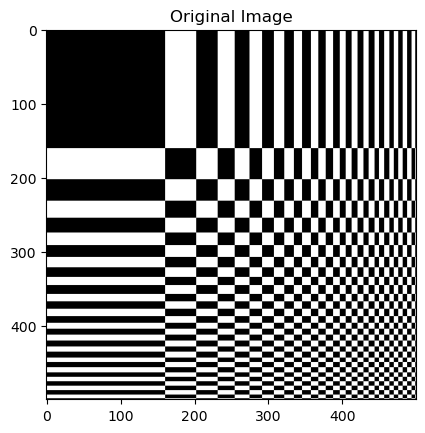

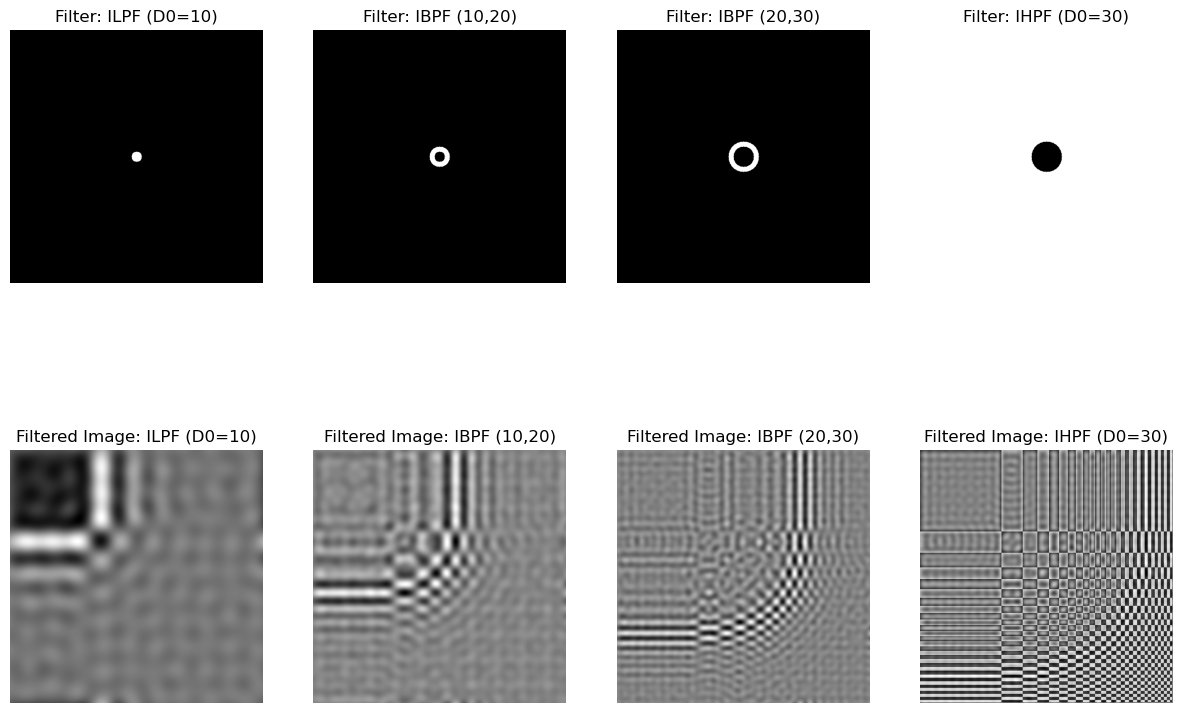

In [4]:
# Plot the filters and the filtered images
filters = [ilpf_10, ibpf_10_20, ibpf_20_30, ihpf_30]
filtered_images = [filtered_low, filtered_band_1, filtered_band_2, filtered_high]
titles = ['ILPF (D0=10)', 'IBPF (10,20)', 'IBPF (20,30)', 'IHPF (D0=30)']

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15, 10))
for i in range(4):
    # Plot the filters
    plt.subplot(2, 4, i + 1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(f'Filter: {titles[i]}')
    plt.axis('off')

    # Plot the filtered images
    plt.subplot(2, 4, i + 5)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f'Filtered Image: {titles[i]}')
    plt.axis('off')

plt.show()

# Question-2

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('characters.tif', 0)  # image should be in grayscale

P, Q = image.shape

centered_image = np.array([[image[i, j] * ((-1) ** (i + j)) for j in range(Q)] for i in range(P)])

dft = np.fft.fft2(centered_image)


In [6]:
def distance(u, v, P, Q):
    return np.sqrt((u - P / 2) ** 2 + (v - Q / 2) ** 2)

def ilpf(P, Q, D0):
    filter_mask = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            if distance(u, v, P, Q) <= D0:
                filter_mask[u, v] = 1
    return filter_mask

def glpf(P, Q, D0):
    filter_mask = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            D = distance(u, v, P, Q)
            filter_mask[u, v] = np.exp(-D**2 / (2 * (D0**2)))
    return filter_mask


In [7]:
def apply_filter(dft, filter_mask):
    # Apply the filter to the DFT
    filtered_dft = dft * filter_mask

    idft = np.fft.ifft2(filtered_dft)

    filtered_image = np.array([[np.real(idft)[i, j] * ((-1) ** (i + j)) for j in range(Q)] for i in range(P)])

    return np.real(filtered_image)


ilpf_100 = ilpf(P, Q, 100)
glpf_100 = glpf(P, Q, 100)

filtered_low = apply_filter(dft, ilpf_100)
filtered_guassian = apply_filter(dft, glpf_100)

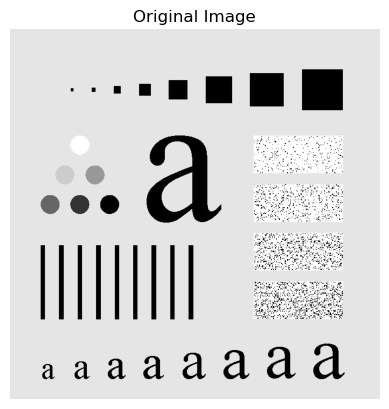

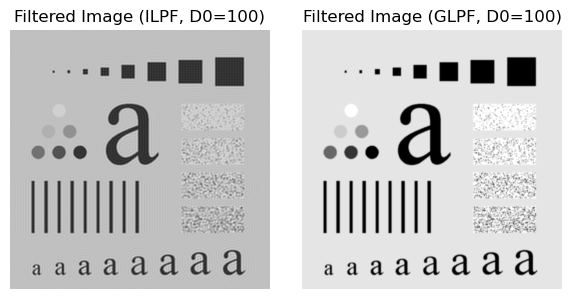

In [8]:
# Plot the original image and filtered images for comparison

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(6, 3))


# Plot the filtered image using ILPF
plt.subplot(1, 2, 1)
plt.imshow(filtered_low, cmap='gray')
plt.title('Filtered Image (ILPF, D0=100)')
plt.axis('off')

# Plot the filtered image using GLPF
plt.subplot(1, 2, 2)
plt.imshow(filtered_guassian, cmap='gray')
plt.title('Filtered Image (GLPF, D0=100)')
plt.axis('off')

plt.tight_layout()
plt.show()